# Desafío - Máquinas de Soporte Vectorial

- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Máquinas de Soporte Vectorial.

## Requerimientos
Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria. Para más detalles técnicos asociados a la base de datos, pueden hacer click en el <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names">link</a>.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe todas las librerías a utilizar.
- Fije los parámetros de los gráficos con `plt.Rcparams`.
- Excluya las columnas `id` y `Unnamed: 32` del set de datos.
- Codifique el vector objetivo `diagnosis` a dato numérico para poder procesarlo posteriormente.

In [1]:
# Utiliza esta celda para importar las librerías y el set de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

plt.rcParams['figure.figsize']=[10,5]

df = pd.read_csv('breast_cancer.csv').drop(['id','Unnamed: 32'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# Primero inspeccionamos si hay datos nulos

df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**No hay datos perdidos**

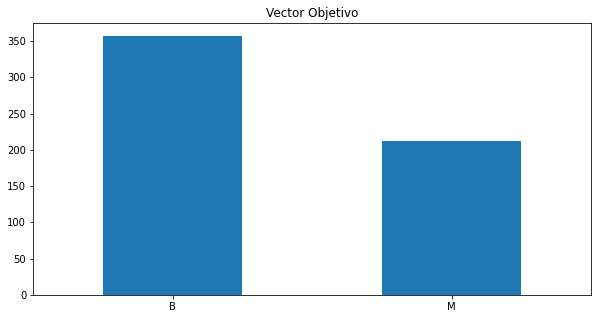

In [3]:
# Utiliza esta celda para explorar las frecuencias del vector objetivo

df['diagnosis'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Vector Objetivo');

In [4]:
# Utiliza esta celda para codificar el vector objetivo, asignando 1 a la clase mayoritaria y -1 a la minoritaria

df['diagnosis'] = df['diagnosis'].replace(['B','M'], [1,-1])
df['diagnosis'].value_counts()

 1    357
-1    212
Name: diagnosis, dtype: int64

### Ejercicio 2: Visualizando la distribución de los atributos
- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

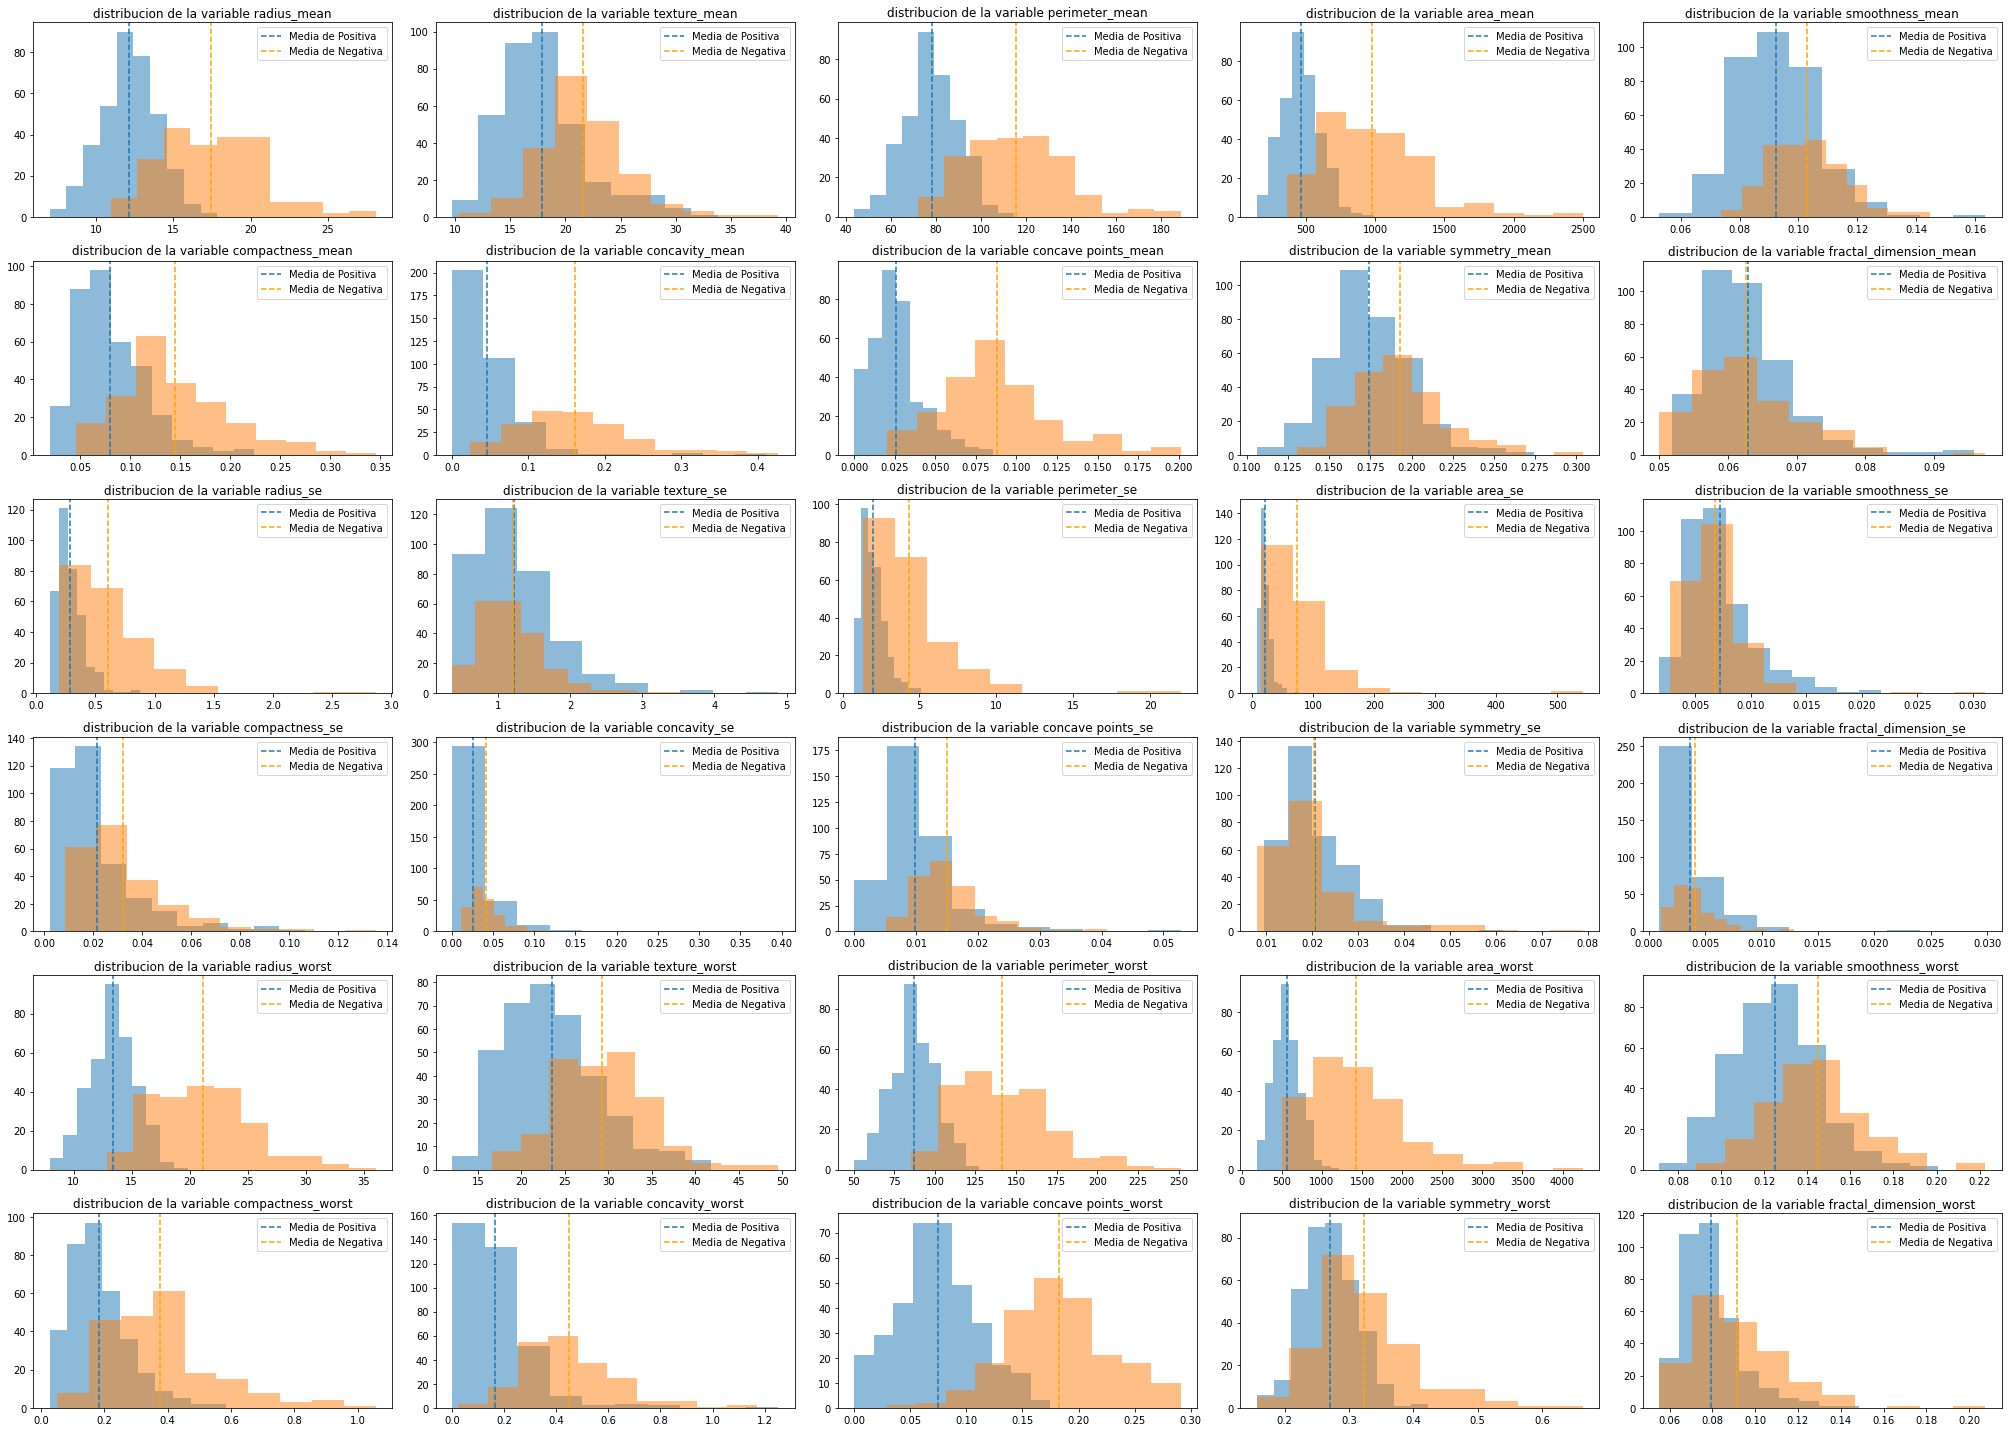

In [5]:
# Utiliza esta celda para graficar los histogramas solicitados
columnas = df.drop(columns= 'diagnosis').columns

plt.figure(figsize=(28,20))

for i,col in enumerate(columnas):

    pos = df[df['diagnosis']==1][col]
    neg = df[df['diagnosis']==-1][col]

    plt.subplot(6,5,i+1)
    plt.hist(pos, alpha=.5)
    plt.hist(neg, alpha=.5)

    plt.axvline(pos.mean(), ls='--', label='Media de Positiva')
    plt.axvline(neg.mean(), ls='--', label='Media de Negativa', color='orange')

    plt.title(f'distribucion de la variable {col}')
    plt.legend()
    plt.tight_layout()

**Comentarios**

**En general para todas las vareiables, los valores para la clase 1 (tumor `Benigno`) son muchos más bajos que los de la clase -1 (tumor `Maligno`), esto se puede apreciar no solo en la distribución de los datos, sino que tambien en las medias de cada una de las distribuciones de las clases, ya que la `Media de -1 (negativa)` es mayor que la `Media de 1 (positiva)` en casi todas las variables, excepto para las variable `fractal_dimension_mean`,`texture_se`, `smoothness_se` y `symmetry_se` donde ocurre el fenómeno contrario**

### Ejercicio 3: Estimando el porcentaje de overlap en los atributos
- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvia es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
- El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:
```python
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    
    # preserve histograms
    tmp_hist_holder = dict()
    
    # for each target class
    tar_values = df[target].unique()
    for unique_value in tar_values:
        # get histogram
        tmp, _ = np.histogram(
            df[df[target] == unique_value][attribute],   # for a specific attribute
            bins=perc,   # define percentage
            range=[empirical_lower_bound, empirical_upper_bound]   # limit empirical range for comparison
        )
        
        # append to dict
        tmp_hist_holder[f"h_{unique_value}"] = tmp
        
    get_minima = np.minimum(
        tmp_hist_holder[f"h_{tar_values[0]}"],
        tmp_hist_holder[f"h_{tar_values[1]}"]
    )
    
    intersection = np.true_divide(
        np.sum(get_minima),
        np.sum(tmp_hist_holder[f"h_{tar_values[0]}"])
    )
    
    return intersection
```
- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
- Utilizando la función, generará un data frame donde almacenará el nombre del atributo y su porcentaje. Ordene este data frame de forma descendente y preserve.

In [6]:
# Utiliza esta celda para definir la función entregada
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    
    # preserve histograms
    tmp_hist_holder = dict()
    
    # for each target class
    tar_values = df[target].unique()
    for unique_value in tar_values:
        # get histogram
        tmp, _ = np.histogram(
            df[df[target] == unique_value][attribute],   # for a specific attribute
            bins=perc,   # define percentage
            range=[empirical_lower_bound, empirical_upper_bound]   # limit empirical range for comparison
        )
        
        # append to dict
        tmp_hist_holder[f"h_{unique_value}"] = tmp
        
    get_minima = np.minimum(
        tmp_hist_holder[f"h_{tar_values[0]}"],
        tmp_hist_holder[f"h_{tar_values[1]}"]
    )
    
    intersection = np.true_divide(
        np.sum(get_minima),
        np.sum(tmp_hist_holder[f"h_{tar_values[0]}"])
    )
    
    return intersection

In [7]:
# Utiliza esta celda para generar el DatFrame solicitado

df_overlap = pd.DataFrame([[columna ,histogram_overlap(df, columna, 'diagnosis')] for columna in columnas], columns=['Variable', 'Coef. Overlap']).sort_values(by='Coef. Overlap', ascending=False)
df_overlap

,Variable,Coef. Overlap
19,fractal_dimension_se,1.000000
14,smoothness_se,0.995283
9,fractal_dimension_mean,0.990566
18,symmetry_se,0.957547
11,texture_se,0.924528
15,compactness_se,0.882075
4,smoothness_mean,0.877358
8,symmetry_mean,0.858491
17,concave points_se,0.853774
29,fractal_dimension_worst,0.830189


### Ejercicio 4: Selección del modelo por GridSearchCV
- Entrene una serie de modelos SVC con los siguientes hiper parámetros:
    - `C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]`
    - `gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]`
    - Validaciones cruzadas: 10
    
- Genere un heatmap en base a los puntajes estimados con `GridSearchCV`. _Tip_: Vea cómo acceder a la llave `mean_test_score` en el diccionario `cv_results_`.
- Reporte en qué rango de cada hiper parámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiper parámetros y el desempeño en la muestra de entrenamiento.

### Digresión: Un par de elementos a considerar en la implementación de GridSearchCV
Si trabajamos con `sklearn.model_selection.GridSearchCV`, tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos `X_train` y `y_train` a nuestro objeto instanciado y preservando `X_test` e `y_test` como una muestra de validación externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.

-  El objeto creado con `sklearn.model_selection.GridSearchCV` sigue la misma funcionalidad de cualquier método de estimación de scikit-learn, con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
    - `sklearn.model_selection.GridSearchCV.cv_results_` devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo.
    - `split`: Indicará la métrica específica en cada validación cruzada y combinación de hiper parámetros.
    - `time`: Indicará el tiempo de ejecución en cada modelo.
    - Por lo general trabajaremos con `mean_test_score` y `mean_train_score` que representa la media de CV para cada combinación de hiper parámetros.
    - `sklearn.model_selection.GridSearchCV.best_estimator_` devuelve un modelo listo para entrenar con la mejor combinación de hiper parámetros.
    - `sklearn.model_selection.GridSearchCV.best_score_` devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá Accuracy, si es un problema de regresión devolverá MSE.

In [8]:
# Utiliza esta celda para dividir las muestras

df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=13)

In [9]:
# Utiliza esta celda para definir el pipeline (use kernel rbf)


In [10]:
# Utiliza esta celda para definir la grilla de parámetros

hiper_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [11]:
# Utiliza esta celda para definir el objeto GridSearchCV

modelo_svc = SVC(random_state=13)
grilla = GridSearchCV(modelo_svc, hiper_params, cv=10, return_train_score=True)

In [12]:
# Utiliza esta celda para entrenar la grilla

grilla.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=13),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True)

In [13]:
grilla.best_params_

{'C': 1, 'gamma': 0.0001}

In [14]:
# Utiliza esta celda para definir la función para reportar los heatmaps de hiperparámetros
def report_heatmaps(cv_trained):
    param1 = tuple(cv_trained.param_grid.keys())[0]
    param2 = tuple(cv_trained.param_grid.keys())[1]
    
    # Mejores parámetros subconjuntos para test
    plt.subplot(1, 2, 1)
    sns.heatmap(
        cv_trained.cv_results_['mean_test_score'].reshape(len(cv_trained.param_grid[param1]), len(cv_trained.param_grid[param2])),
        cmap='Blues',
        annot=True,
        xticklabels=cv_trained.param_grid[param2],
        yticklabels=cv_trained.param_grid[param1],
        cbar=False
    )
    
    plt.ylabel(param1)
    plt.xlabel(param2)
    plt.title('Test CV')
    
    # Mejores parámetros subconjuntos para train
    plt.subplot(1, 2, 2)
    sns.heatmap(
        cv_trained.cv_results_['mean_train_score'].reshape(len(cv_trained.param_grid[param1]), len(cv_trained.param_grid[param2])),
        cmap='Blues',
        annot=True,
        xticklabels=cv_trained.param_grid[param2],
        yticklabels=cv_trained.param_grid[param1],
        cbar=False
    )
    
    plt.ylabel(param1)
    plt.xlabel(param2)
    plt.title('Train CV')
    plt.tight_layout()

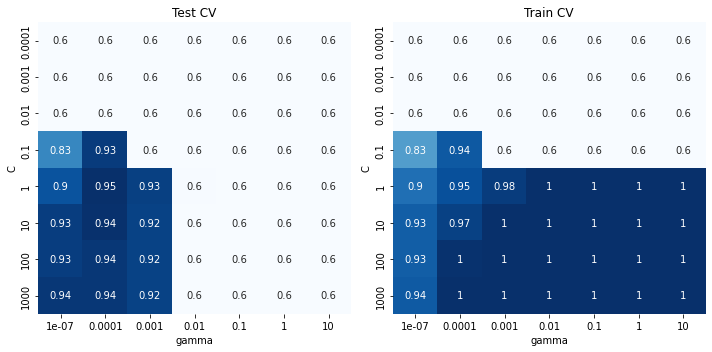

In [15]:
# Utiliza esta celda para llamar la función definida

report_heatmaps(grilla)

In [16]:
# Utiliza esta celda para reportar los mejores hiperparámetros y mejor puntaje

print(f'Mejores hiperparámetros: {grilla.best_params_}')
print(f'Mejores puntaje: {grilla.best_score_}')

Mejores hiperparámetros: {'C': 1, 'gamma': 0.0001}
Mejores puntaje: 0.9474358974358973


### Ejercicio 5: Validación del modelo en el Test set sample
- Genere las predicciones del Test set sample en base a la mejor combinación de hiperparámetros.
- Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación.
- Comente en qué casos el modelo presenta un desempeño deficiente.

In [17]:
# Utiliza esta celda para reportar las métricas del mejor modelo

y_hat = grilla.best_estimator_.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.88      0.85      0.86        60
           1       0.93      0.95      0.94       128

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



In [18]:
grilla.best_score_

0.9474358974358973

**Comentarios**

En terminos generales, tenemos un excelente modelo, ya que para nuestro set de datos de validacion (o testeo) nos da un accuracy de 0.91 lo cual es muy bueno, ademas que la precision, recall y f1-score para cada una de las clases es mayor a 0.85, lo cual es demasiado bueno. Por lo tanto, podemos decir que nuestro modelo logra distingir de buena forma cada una de las clases.